In [1]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

## make a generic cell migration schema

In [2]:
cell_migration = ModelBuilder(model_name="cell_migration")

# add objects
cell_migration.add_object(
    name="universe", 
    object_type="Universe", 
    contained_objects=[
        "environment"
    ]
)
cell_migration.add_object(
    name="environment", 
    object_type="MaterialObjectSpace",
    contained_objects=[
        "single_cell",
    ]
)
cell_migration.add_object(
    name="single_cell",
    object_type="Cell"
)

# add processes
cell_migration.add_process(
    name="motile force",
    process_type="MotileForce",
    participating_objects=["single_cell"]
)

Model saved to models/cell_migration_generic.json


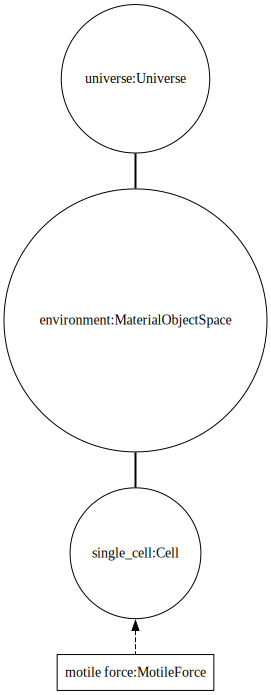

In [3]:
cell_migration.validate()
cell_migration.save(filename='cell_migration_generic.json')
cell_migration.graph()

## Specialize the model for cellular potts

Specialized object 'single_cell' from 'Cell' to 'CellCPM'
Model saved to models/cell_migration_cpm.json


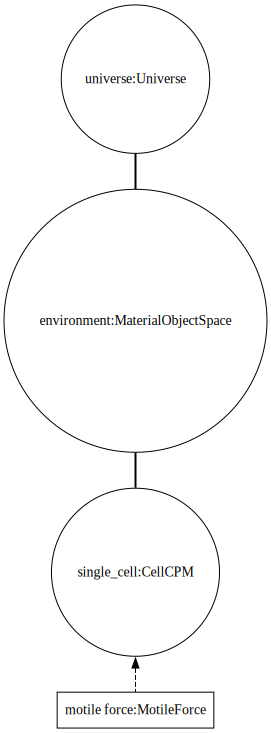

In [4]:
# specialize the model
cell_migration.specialize(
    path=['objects', 'single_cell'],
    new_type='CellCPM')

# validate and save specialized model
cell_migration.validate()
cell_migration.save(filename='cell_migration_cpm.json')
cell_migration.graph()